## 목차

1. [방문지데이터준비](#eda-data-load)
2. [EDA](#eda)

   - [여행목적](#one)
     > 여행 목적을 파악해보자

   1. 방문선택이유 -> 어떤 이유로 많이 여행을 갈까?
   2. 여행하는 동안에 어떤 유형의 방문지를 많이 갈까?
   3. 한 여행당 평균적으로 방문지 유형을 얼마나 방문했는지 (비율)

   - [여행성향](#two)
     > 여행 성향을 파악해보자

   1. 여행객들의 여행기간은 어떠할까?
   2. 여행기간(당일, 1박2일, 2박3일이상) 동안의 방문한 곳은 얼마나 될까?

   - [계절에따른](#three)
     > 계절별 여행 방문지 파악

   1. 계절별(여름,가을) 방문유형 -> 숙소비율이 줄어들어서 여름일수록 당일치기를 다니나? 0.14 -> 0.08
   2. 계절별 여행기간 확인 --> 의외로 여름에 당일치기 비율이 높더라 ▲ 위 내용 확인됨

   - [여행후기](#four)
     > 여행은 어땠을지 알아보자

   1. 여행객들의 평균적인 만족도, 재방문의향, 추천의향은 어떠할까? 방문지유형에 따라

3. [아이디어](#idea)

<br/>

---


## EDA Data Load


In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = r'C:\Windows\Fonts\HMFMMUEX.TTC'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
def columns_eng_to_kor(df):
    mapping = {
        'VISIT_AREA_ID': "방문지ID", 
        'TRAVEL_ID': "여행ID", 
        'VISIT_ORDER': "진행순서", 
        'VISIT_AREA_NM': "방문지명",
        'VISIT_START_YMD': "방문시작일자", 
        'VISIT_END_YMD': "방문종료일자", 
        'VISIT_AREA_TYPE_CD': "방문지유형코드", 
        'VISIT_CHC_REASON_CD': "방문선택이유코드",
        'REVISIT_YN': "재방문여부",
        'DGSTFN': "만족도", 
        'REVISIT_INTENTION': "재방문의향", 
        'RCMDTN_INTENTION': "추천의향"
    }
    return df.rename(columns=mapping) 

visit_tbl = pd.read_csv('../../data/training/preprocessing/eda_visit_tbl.csv')
visit_tbl = visit_tbl.drop('Unnamed: 0', axis=1)

df = visit_tbl.copy()

# 한글명으로 변경
df = columns_eng_to_kor(visit_tbl)

# 데이터타입 변경
df = df.astype({"방문지ID": "object", "방문지유형코드": "object", "방문선택이유코드": "object"})
df['방문시작일자'] = pd.to_datetime(df['방문시작일자'])
df['방문종료일자'] = pd.to_datetime(df['방문종료일자'])

In [37]:
df

,방문지ID,여행ID,진행순서,방문지명,방문시작일자,방문종료일자,방문지유형코드,재방문여부,방문선택이유코드,만족도,재방문의향,추천의향
0,2304300001,e_e000004,1,집,2023-04-30,2023-04-30,21,NaN,NaN,NaN,NaN,NaN
1,2304300002,e_e000004,2,화성 관광열차 안내소 연무대 매표소,2023-04-30,2023-04-30,2,N,10.0,4.0,3.0,4.0
2,2304300003,e_e000004,3,창룡문,2023-04-30,2023-04-30,2,N,1.0,4.0,4.0,4.0
3,2304300004,e_e000004,4,수원 화성 화홍문,2023-04-30,2023-04-30,2,N,10.0,4.0,3.0,3.0
4,2304300005,e_e000004,5,집,2023-04-30,2023-05-01,21,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
21379,2308270002,h_h003275,2,용인농촌테마파크,2023-08-27,2023-08-27,13,N,1.0,4.0,4.0,4.0
21380,2308270003,h_h003275,3,내동마을 연꽃 단지,2023-08-27,2023-08-27,1,N,2.0,3.0,4.0,3.0
21381,2308270004,h_h003275,4,외할머니 집,2023-08-27,2023-08-27,11,N,2.0,3.0,2.0,3.0
21382,2308270005,h_h003275,5,삼성화재 모빌리티 뮤지엄,2023-08-27,2023-08-27,13,Y,4.0,5.0,5.0,5.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21384 entries, 0 to 21383
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   방문지ID     21384 non-null  object        
 1   여행ID      21384 non-null  object        
 2   진행순서      21384 non-null  int64         
 3   방문지명      21384 non-null  object        
 4   방문시작일자    21384 non-null  datetime64[ns]
 5   방문종료일자    21384 non-null  datetime64[ns]
 6   방문지유형코드   21384 non-null  object        
 7   재방문여부     15733 non-null  object        
 8   방문선택이유코드  15757 non-null  object        
 9   만족도       15725 non-null  float64       
 10  재방문의향     15725 non-null  float64       
 11  추천의향      15725 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(6)
memory usage: 2.0+ MB


In [40]:
df.describe()

,진행순서,방문시작일자,방문종료일자,만족도,재방문의향,추천의향
count,21384.000000,21384,21384,15725.000000,15725.000000,15725.000000
mean,5.871352,2023-07-10 08:56:09.696969472,2023-07-10 12:59:35.757575680,4.296407,4.103657,4.183339
min,1.000000,2023-04-28 00:00:00,2023-04-28 00:00:00,1.000000,1.000000,1.000000
25%,3.000000,2023-06-05 00:00:00,2023-06-05 00:00:00,4.000000,3.000000,4.000000
50%,5.000000,2023-07-06 00:00:00,2023-07-06 00:00:00,4.000000,4.000000,4.000000
75%,8.000000,2023-08-19 00:00:00,2023-08-19 00:00:00,5.000000,5.000000,5.000000
max,38.000000,2023-09-18 00:00:00,2023-09-19 00:00:00,5.000000,5.000000,5.000000
std,4.589908,NaN,NaN,0.813562,0.979406,0.908650


In [ ]:
# EDA 
# ※ 의미없는 로우 (집, 친구/친지집, 사무실) 제거 / 단, 여행기간 구할 때는 제거하면 안됨 

# 여행 목적을 파악해보자
# 1) 방문선택이유 -> 어떤 이유로 많이 여행을 갈까? 
# 2) 여행하는 동안에 어떤 유형의 방문지를 많이 갈까? 

# 여행 성향을 파악해보자
# 1) 여행객들의 여행기간은 어떠할까? 
# 2) 여행기간(당일, 1박2일, 2박3일이상) 동안의 방문한 곳은 얼마나 될까? 

# 여행 후기를 알아보자
# 1) 여행객들의 평균적인 만족도, 재방문의향, 추천의향은 어떠할까? 방문지유형에 따라

# 계절이 여행방문지에 어떤 영향이 있을지 확인해보자

## EDA

※ 의미없는 로우 (집, 친구/친지집, 사무실) 제거


In [44]:
# VIS = {집:21, 친구/친지집:22, 사무실:23} 제외
vis_code = ['21', '22', '23'] 
clean_df = df[~df['방문지유형코드'].apply(lambda x: str(x) in vis_code)]

In [48]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15608 entries, 1 to 21382
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   방문지ID     15608 non-null  object        
 1   여행ID      15608 non-null  object        
 2   진행순서      15608 non-null  int64         
 3   방문지명      15608 non-null  object        
 4   방문시작일자    15608 non-null  datetime64[ns]
 5   방문종료일자    15608 non-null  datetime64[ns]
 6   방문지유형코드   15608 non-null  object        
 7   재방문여부     15600 non-null  object        
 8   방문선택이유코드  15600 non-null  object        
 9   만족도       15600 non-null  float64       
 10  재방문의향     15600 non-null  float64       
 11  추천의향      15600 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(6)
memory usage: 1.5+ MB


In [47]:
clean_df.describe()

,진행순서,방문시작일자,방문종료일자,만족도,재방문의향,추천의향
count,15608.000000,15608,15608,15600.000000,15600.000000,15600.000000
mean,6.206433,2023-07-09 19:23:35.274218240,2023-07-09 20:35:05.381855488,4.296218,4.102821,4.185705
min,1.000000,2023-04-28 00:00:00,2023-04-28 00:00:00,1.000000,1.000000,1.000000
25%,3.000000,2023-06-05 00:00:00,2023-06-05 00:00:00,4.000000,3.000000,4.000000
50%,5.000000,2023-07-04 00:00:00,2023-07-04 00:00:00,4.000000,4.000000,4.000000
75%,8.000000,2023-08-16 00:00:00,2023-08-16 00:00:00,5.000000,5.000000,5.000000
max,37.000000,2023-09-18 00:00:00,2023-09-18 00:00:00,5.000000,5.000000,5.000000
std,4.438331,NaN,NaN,0.814013,0.980190,0.906947


### one

---


#### 여행 목적을 파악해보자

1. 방문선택이유 -> 어떤 이유로 많이 여행을 갈까?
2. 여행하는 동안에 어떤 유형의 방문지를 많이 갈까?
3. 한 여행당 평균적으로 방문지 유형을 얼마나 방문했는지 (비율)


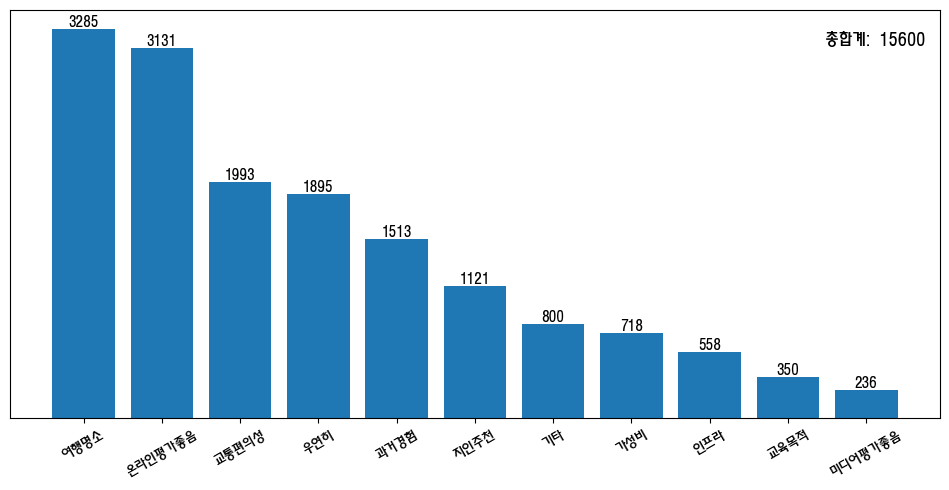

In [ ]:
# 1 
visit_groupby = clean_df.groupby('방문선택이유코드')['여행ID'].count()
visit_groupby_sort = visit_groupby.sort_values(ascending=False)

name_map = {
    1: "여행명소",
    2: "온라인평가좋음",
    3: "미디어평가좋음",
    4: "과거경험",
    5: "지인추천",
    6: "교통편의성",
    7: "인프라",
    8: "가성비",
    9: "우연히",
    10: "교육목적",
    11: "기타",
}

x_index = [name_map.get(i, i) for i in visit_groupby_sort.index]

plt.figure(figsize=(10, 5))

bars = plt.bar(x_index, visit_groupby_sort)

# 카운트 그래프 표시
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # 가운데
        height,                             # 막대위
        f'{int(height)}',                   # 값
        ha='center', va='bottom'            # 정렬
    )

# 총합계 표시
plt.figtext(0.97, 0.9, f"총합계: {visit_groupby_sort.sum()}", ha='right', fontsize=12, fontweight='bold')

plt.xticks(rotation=30, ha='center')
plt.tight_layout()
plt.gca().yaxis.set_visible(False)
plt.show()

- 나머지 8 곳은 뭘까? (방문지 유형은 숙소) -> 진행순서 1 이므로 의미없음 확인


In [144]:
temp = clean_df[clean_df['방문지유형코드'] == 24].reset_index(drop=True)
temp[temp['방문선택이유코드'].isnull() == True]

,방문지ID,여행ID,진행순서,방문지명,방문시작일자,방문종료일자,방문지유형코드,재방문여부,방문선택이유코드,만족도,재방문의향,추천의향
30,2305270001,e_e000346,1,숙소,2023-05-27,2023-05-27,24,NaN,NaN,NaN,NaN,NaN
327,2305280001,e_e001499,1,숙소,2023-05-28,2023-05-28,24,NaN,NaN,NaN,NaN,NaN
367,2306030001,e_e002051,1,숙소,2023-06-03,2023-06-03,24,NaN,NaN,NaN,NaN,NaN
568,2306170001,e_e003245,1,숙소,2023-06-17,2023-06-17,24,NaN,NaN,NaN,NaN,NaN
579,2306170001,e_e003289,1,숙소,2023-06-17,2023-06-17,24,NaN,NaN,NaN,NaN,NaN
654,2306240001,e_e003632,1,숙소,2023-06-24,2023-06-24,24,NaN,NaN,NaN,NaN,NaN
784,2307020001,e_e004409,1,숙소,2023-07-02,2023-07-02,24,NaN,NaN,NaN,NaN,NaN
1121,2304290001,f_f000038,1,숙소,2023-04-29,2023-04-29,24,NaN,NaN,NaN,NaN,NaN


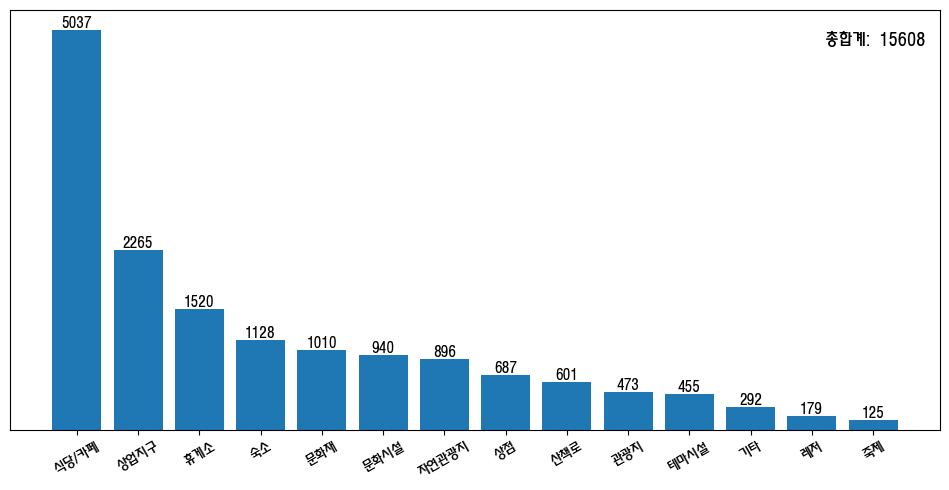

In [ ]:
# 2 
visit_groupby = clean_df.groupby('방문지유형코드')['여행ID'].count()
visit_groupby_sort = visit_groupby.sort_values(ascending=False)

name_map = {
    1: "자연관광지",
    2: "문화재",
    3: "문화시설",
    4: "상업지구",
    5: "레저",
    6: "테마시설",
    7: "산책로",
    8: "축제",
    9: "휴게소",
    10: "상점",
    11: "식당/카페",
    12: "기타",
    13: "관광지",
    21: "집",
    22: "친구/친지집",
    23: "사무실",
    24: "숙소"
}

visit_groupby_sort_index = [name_map.get(i, i) for i in visit_groupby_sort.index]

plt.figure(figsize=(10, 5))

bars = plt.bar(visit_groupby_sort_index, visit_groupby_sort)

# 카운트 그래프 표시
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # 가운데
        height,                             # 막대위
        f'{int(height)}',                   # 값
        ha='center', va='bottom'            # 정렬
    )

# 총합계 표시
plt.figtext(0.97, 0.9, f"총합계: {visit_groupby_sort.sum()}", ha='right', fontsize=12, fontweight='bold')

plt.xticks(rotation=30, ha='center')
plt.tight_layout()
plt.gca().yaxis.set_visible(False)
plt.show()

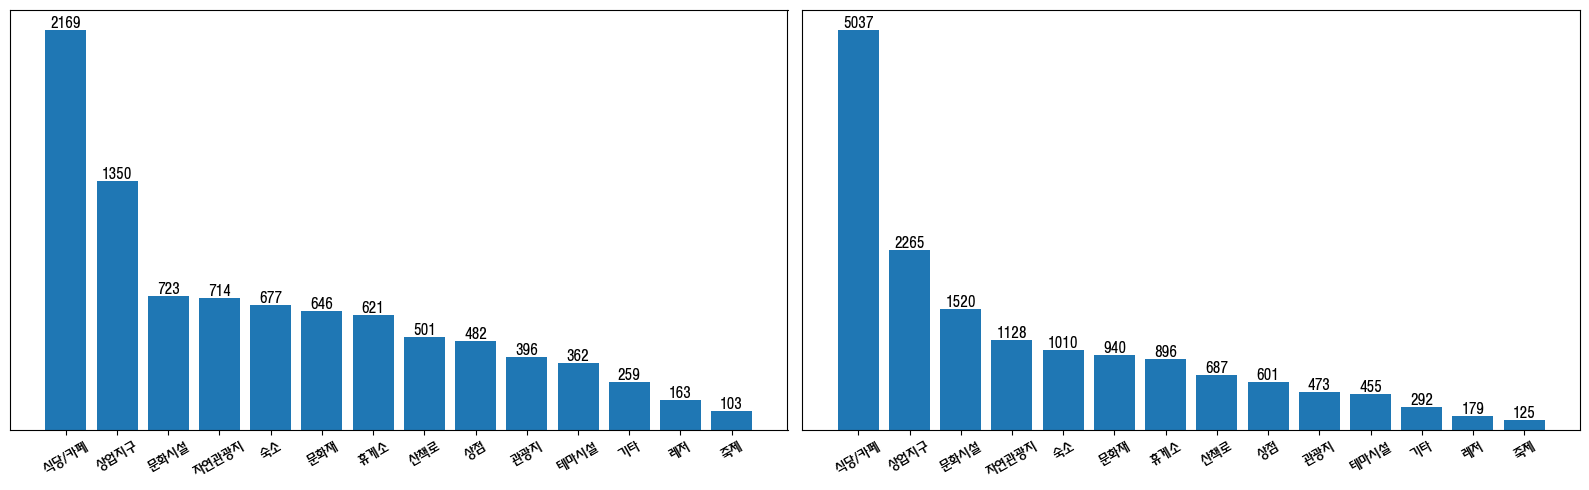

In [ ]:
# 3
# 목적 >> 여행ID별 여행중에서 중복으로 방문하는 유형 순위를 알고싶음 
total_visit = clean_df.groupby('방문지유형코드')['여행ID'].count()    # 유형별 여행ID 카운트 (중복방문)
unique_visit = clean_df.groupby('방문지유형코드')['여행ID'].nunique() # 유형별 unique한 여행ID 카운트 
avg_visit = total_visit / unique_visit
# avg_visit # 1유형 : 1.254902 >>> 4명중 1명은 자연관광지유형을 2번 방문

unique_visit_sort = unique_visit.sort_values(ascending=False)

name_map = {
    1: "자연관광지",
    2: "문화재",
    3: "문화시설",
    4: "상업지구",
    5: "레저",
    6: "테마시설",
    7: "산책로",
    8: "축제",
    9: "휴게소",
    10: "상점",
    11: "식당/카페",
    12: "기타",
    13: "관광지",
    21: "집",
    22: "친구/친지집",
    23: "사무실",
    24: "숙소"
}

# 코드 -> 한글명 변경
unique_visit_sort_index = [name_map.get(i, i) for i in unique_visit_sort.index]

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# 유니크방문
bars1 = axes[0].bar(unique_visit_sort_index, unique_visit_sort)
for bar in bars1:
    height = bar.get_height()
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{round(height, 2)}',
        ha='center', va='bottom'
    )
axes[0].set_xticklabels(x_index, rotation=30, ha='center')
axes[0].yaxis.set_visible(False)

# 중복방문
bars2 = axes[1].bar(x_index, visit_groupby_sort) 
for bar in bars2:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{round(height, 2)}',
        ha='center', va='bottom'
    )
axes[1].set_xticklabels(x_index, rotation=30, ha='center')
axes[1].yaxis.set_visible(False)

plt.tight_layout()
plt.show()

### two

---


#### 여행 성향을 파악해보자

1. 여행객들의 여행기간은 어떠할까?
2. 여행기간(당일, 1박2일, 2박3일이상) 동안의 방문한 곳은 얼마나 될까?


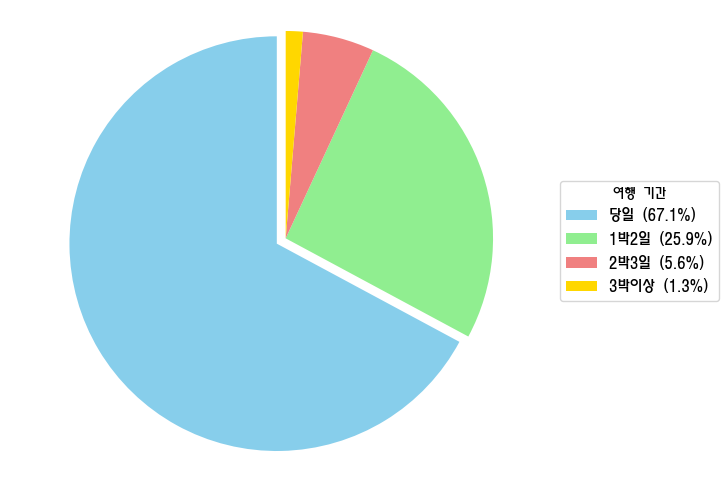

In [ ]:
# 1
trip_days = df.groupby('여행ID').apply(lambda x: (x['방문종료일자'].max() - x['방문시작일자'].min()).days).reset_index(name='여행기간')
trip_days['여행기간'] = trip_days['여행기간'].apply(lambda x : 4 if x>4 else x)
trip_days_cnt = trip_days.groupby('여행기간')['여행ID'].count()

df_merged = pd.merge(
    df,
    trip_days,
    on='여행ID',      
    how='left'        
)

trip_days_cnt_sort = trip_days_cnt.sort_values(ascending=False)
name_map = {
    1: "당일",
    2: "1박2일",
    3: "2박3일",
    4: "3박이상",
    # 5: "4박이상"
}

trip_days_cnt_sort_index = [name_map.get(i, i) for i in trip_days_cnt_sort.index]

sizes = trip_days_cnt_sort
labels = trip_days_cnt_sort_index
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold'] 
explode = [0.05 if cnt == max(sizes) else 0 for cnt in sizes]

plt.figure(figsize=(7, 6))

total = sum(sizes)
labels_with_pct = [f"{label} ({cnt/total:.1%})" for label, cnt in zip(labels, sizes)]

wedges, _ = plt.pie(
    sizes,
    labels=None,  
    autopct=None, 
    startangle=90,
    explode=explode,
    colors=colors
)

plt.legend(
    wedges, labels_with_pct,
    title="여행 기간",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=11
)

plt.axis('equal')  
plt.show()


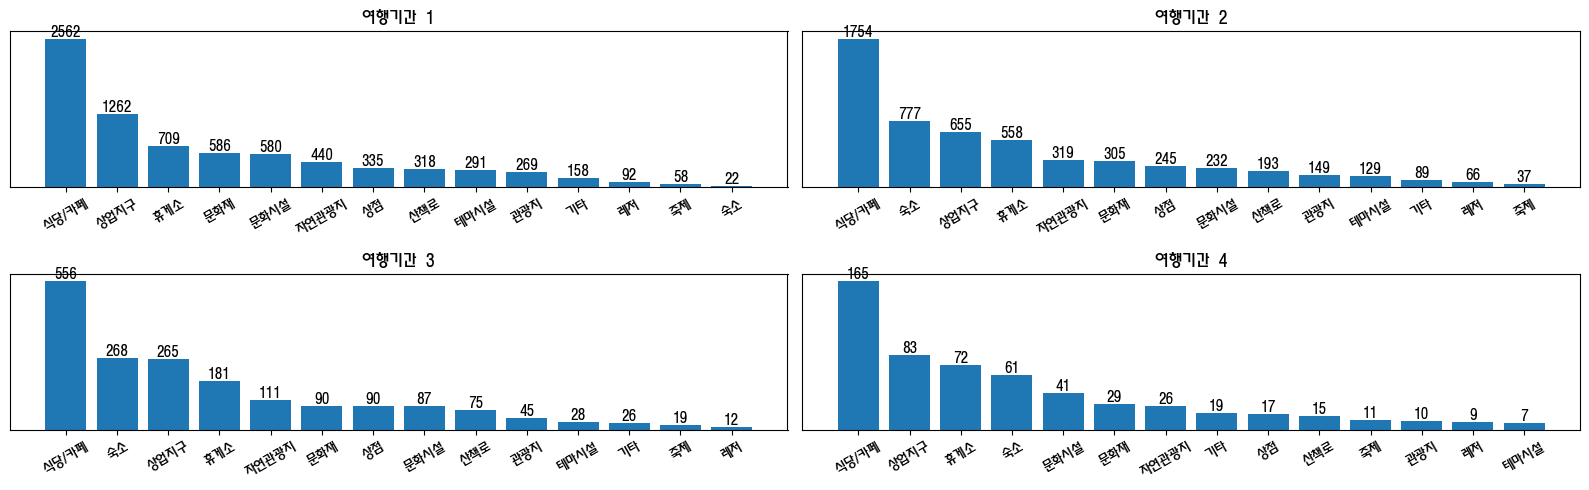

In [ ]:
# 2
name_map = {
    1: "자연관광지",
    2: "문화재",
    3: "문화시설",
    4: "상업지구",
    5: "레저",
    6: "테마시설",
    7: "산책로",
    8: "축제",
    9: "휴게소",
    10: "상점",
    11: "식당/카페",
    12: "기타",
    13: "관광지",
    21: "집",
    22: "친구/친지집",
    23: "사무실",
    24: "숙소"
}

sort_list, index_list = [], []

for i in [1,2,3,4]:
    df_merged_drop = df_merged[df_merged['방문지유형코드'].apply(lambda x: x not in [21,22,23])]
    trip = df_merged_drop[df_merged_drop['여행기간']==i].groupby('방문지유형코드')['여행ID'].count()
    trip_sort = trip.sort_values(ascending=False)
    trip_index = [name_map.get(i, i) for i in trip_sort.index]
    sort_list.append(trip_sort)
    index_list.append(trip_index)


def make_bar_chart(index_list, sort_list, rows=1, cols=1):
    _, axes = plt.subplots(rows, cols, figsize=(16, 5))
  
    if rows * cols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for i, (idx, srt) in enumerate(zip(index_list, sort_list)):
        bars = axes[i].bar(idx, srt)
        for bar in bars:
            height = bar.get_height()
            axes[i].text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f'{round(height, 2)}',
                ha='center', va='bottom'
            )
        axes[i].set_xticks(range(len(idx)))           
        axes[i].set_xticklabels(idx, rotation=30, ha='center')
        axes[i].yaxis.set_visible(False)
        axes[i].set_title(f"여행기간 {i+1}")

    plt.tight_layout()
    plt.show()

make_bar_chart(
    index_list=index_list,
    sort_list=sort_list,
    rows=2, cols=2
)


### three

---


#### 계절별 여행 방문지 파악

1. 계절별(여름,가을) 방문유형 -> 숙소비율이 줄어들어서 여름일수록 당일치기를 다니나? 0.14 -> 0.08
2. 계절별 여행기간 확인 --> 의외로 여름에 당일치기 비율이 높더라 ▲ 위 내용 확인됨


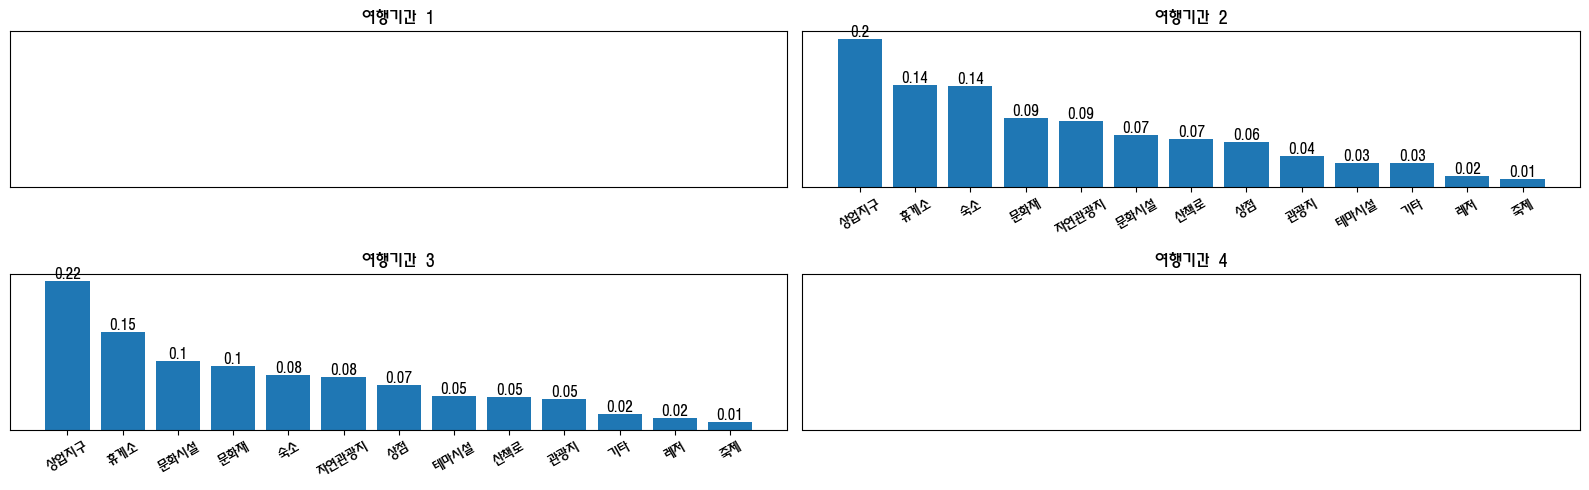

In [ ]:
name_map = {
    1: "자연관광지",
    2: "문화재",
    3: "문화시설",
    4: "상업지구",
    5: "레저",
    6: "테마시설",
    7: "산책로",
    8: "축제",
    9: "휴게소",
    10: "상점",
    11: "식당/카페",
    12: "기타",
    13: "관광지",
    21: "집",
    22: "친구/친지집",
    23: "사무실",
    24: "숙소"
}

sort_list, index_list = [], []

# 계절
for i, season_list in enumerate([[1,2,3],[4,5,6],[7,8,9],[10,11,12]]):
    df_merged_drop = df_merged[df_merged['방문지유형코드'].apply(lambda x: x not in [11, 21,22,23])]
    trip = df_merged_drop[df_merged_drop['방문시작일자'].apply(lambda x: x.month in season_list)].groupby('방문지유형코드')['여행ID'].count()
    trip_sort = trip.sort_values(ascending=False)
    trip_index = [name_map.get(i, i) for i in trip_sort.index]
    sort_list.append(trip_sort/trip_sort.sum())
    index_list.append(trip_index)


def make_bar_chart(index_list, sort_list, rows=1, cols=1):
    _, axes = plt.subplots(rows, cols, figsize=(16, 5))
  
    if rows * cols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for i, (idx, srt) in enumerate(zip(index_list, sort_list)):
        bars = axes[i].bar(idx, srt)
        for bar in bars:
            height = bar.get_height()
            axes[i].text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f'{round(height, 2)}',
                ha='center', va='bottom'
            )
        axes[i].set_xticks(range(len(idx)))           
        axes[i].set_xticklabels(idx, rotation=30, ha='center')
        axes[i].yaxis.set_visible(False)
        axes[i].set_title(f"여행기간 {i+1}")

    plt.tight_layout()
    plt.show()

make_bar_chart(
    index_list=index_list,
    sort_list=sort_list,
    rows=2, cols=2
)


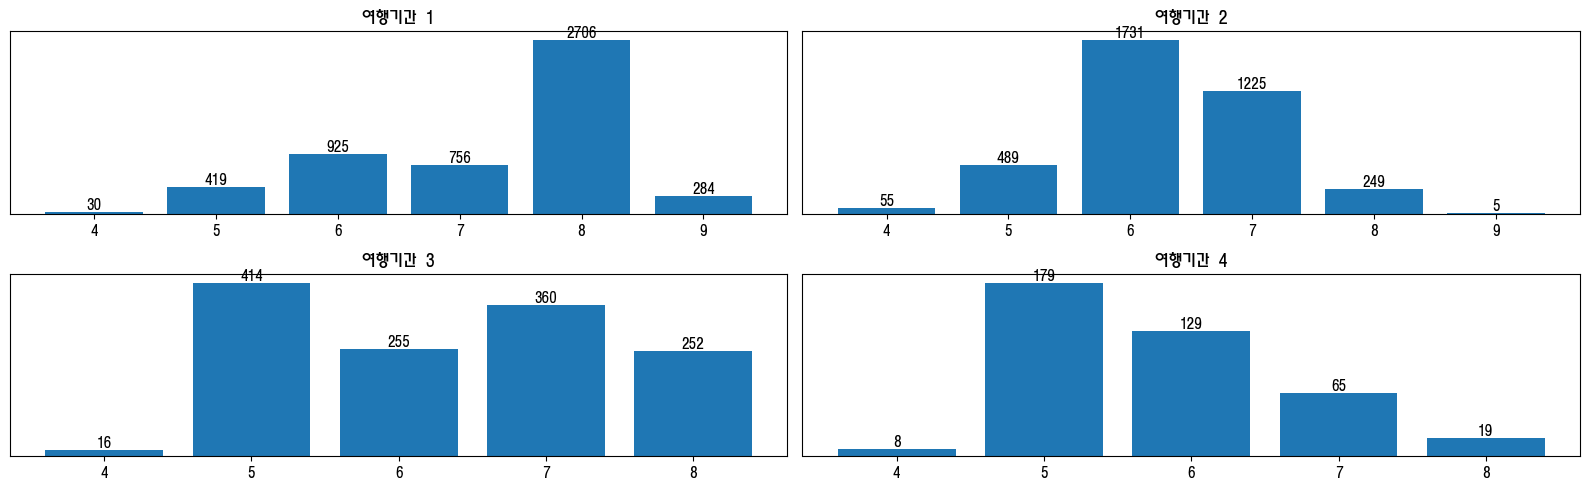

In [ ]:
# 여름일수록 당일치기가 많아서 숙소가 줄어듬? ㅇㅇ 여름에 당일치기 선호
sort_list, index_list = [], []

# 계절
for i in [1,2,3,4]:
    df_merged_drop = df_merged[df_merged['방문지유형코드'].apply(lambda x: x not in [11, 21,22,23])]
    df_merged_drop['월'] = df_merged_drop['방문시작일자'].dt.month
    trip = df_merged_drop[df_merged_drop['여행기간']==i].groupby('월')['여행ID'].count()
    trip_sort = trip.sort_values(ascending=False)
    trip_index = trip_sort.index
    sort_list.append(trip_sort)
    # sort_list.append(trip_sort/trip_sort.sum())
    index_list.append(trip_index)


def make_bar_chart(index_list, sort_list, rows=1, cols=1):
    _, axes = plt.subplots(rows, cols, figsize=(16, 5))
  
    if rows * cols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for i, (idx, srt) in enumerate(zip(index_list, sort_list)):
        bars = axes[i].bar(idx, srt)
        for bar in bars:
            height = bar.get_height()
            axes[i].text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f'{round(height, 2)}',
                ha='center', va='bottom'
            )
        axes[i].yaxis.set_visible(False)
        axes[i].set_title(f"여행기간 {i+1}")

    plt.tight_layout()
    plt.show()

make_bar_chart(
    index_list=index_list,
    sort_list=sort_list,
    rows=2, cols=2
)


### four

---


#### 여행 후기를 알아보자

1. 여행객들의 평균적인 만족도, 재방문의향, 추천의향은 어떠할까? 방문지유형에 따라


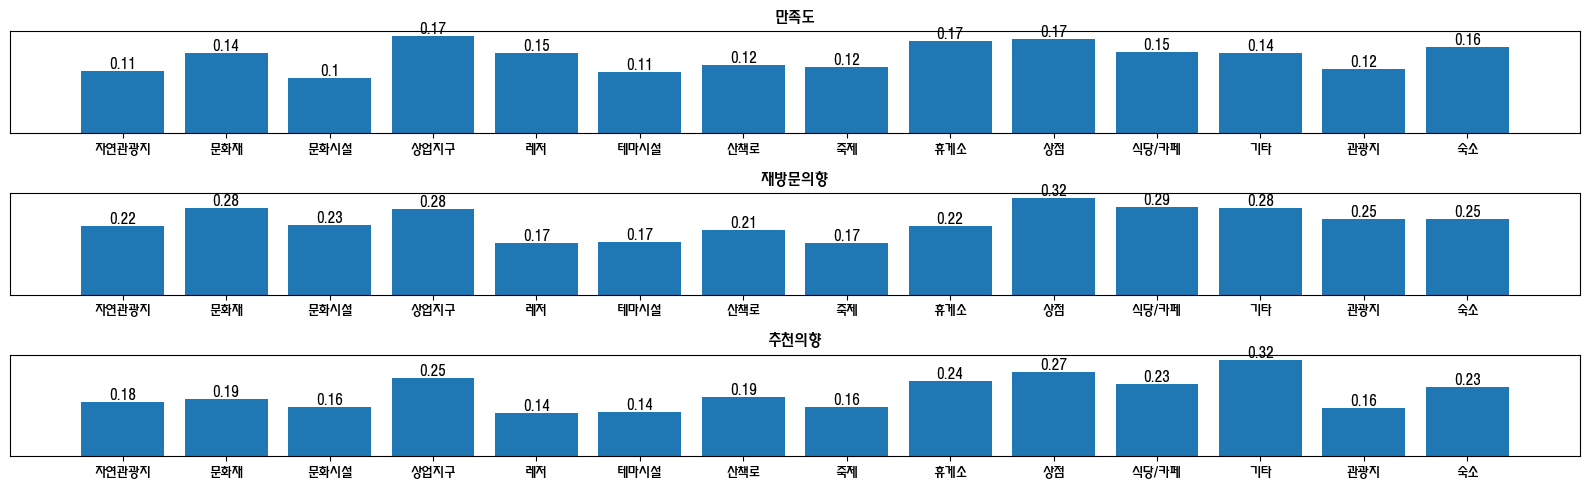

In [ ]:
# 1번 만족점수평균값 / 재방문점수평균값 / 추천점수평균값
# avg_df = clean_df.groupby('방문지유형코드').agg(만족도평균=('만족도', 'mean'),재방문점수평균=('재방문의향', 'mean'),추천점수평균=('추천의향', 'mean')).reset_index()
# avg_df

name_map = {
    1: "자연관광지",
    2: "문화재",
    3: "문화시설",
    4: "상업지구",
    5: "레저",
    6: "테마시설",
    7: "산책로",
    8: "축제",
    9: "휴게소",
    10: "상점",
    11: "식당/카페",
    12: "기타",
    13: "관광지",
    21: "집",
    22: "친구/친지집",
    23: "사무실",
    24: "숙소"
}

def bad_rate(cols_name):
    bad_df = clean_df[clean_df[cols_name] <= 3].groupby('방문지유형코드').agg(bad_cnt=(cols_name, 'count')).reset_index().set_index(keys='방문지유형코드')
    total_df = clean_df.groupby('방문지유형코드').agg(cnt=(cols_name, 'count')).reset_index().set_index(keys='방문지유형코드')
    return bad_df['bad_cnt']/total_df['cnt']

temp1 = bad_rate('만족도')
temp2 = bad_rate('재방문의향')
temp3 = bad_rate('추천의향')

temp1_index = [name_map.get(i, i) for i in temp1.index]
temp2_index = [name_map.get(i, i) for i in temp2.index]
temp3_index = [name_map.get(i, i) for i in temp3.index]

def make_bar_chart(index_list, sort_list, rows=1, cols=1):
    _, axes = plt.subplots(rows, cols, figsize=(16, 5))
  
    if rows * cols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    title = ['만족도','재방문의향','추천의향']
    for i, (idx, srt) in enumerate(zip(index_list, sort_list)):
        bars = axes[i].bar(idx, srt)
        for bar in bars:
            height = bar.get_height()
            axes[i].text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f'{round(height, 2)}',
                ha='center', va='bottom'
            )
        # axes[i].set_xticks(range(len(idx)))           
        # axes[i].set_xticklabels(idx, rotation=30, ha='center')
        axes[i].yaxis.set_visible(False)
        axes[i].set_title(f"{title[i]}")

    plt.tight_layout()
    plt.show()

make_bar_chart(
    index_list=[temp1_index, temp2_index, temp3_index],
    sort_list=[temp1, temp2, temp3],
    rows=3, cols=1
)

# 이번 여행이 망할 확률 예측 -> 어떤 요인이 가장 영향이 클까 ㅎㅎ
# 셋 중 하나라도 3 이하면 >>> target = 망한여행 = Y

# 여행망할확률을 보고 대비하여 덜 상처받는 여행이 되기를 

# 방문지 만족도 재방문의향 추천의향 
# a     3        4         4 
# b     4        3         4
# c     4        4         4
# 지표점수가 여행지 절반 이상 3점이하로 태깅되면 >> 축하합니다. 내돈내산고생투어에 당첨되셨습니다.

# 뭘 조정해야 고생안하고 행복한 여행이 될까

# 그래서 내 여행 스케줄을 입력하면 망할 확률을 예측해주는 

## Idea

---


EDA 하다보니 재밌는 아이디어가 생각이 들었다.

- 이번 여행이 망할 확률 예측 -> 어떤 요인이 가장 영향이 클까 ㅎㅎ
- 만족도/추천의향/재방문의향 3개의 지표 중 하나라도 3 이하면 >>> target = 망한여행이된다 = Y
- 그런데 망한은 어감이 별로니까 다른 '재미있는' 표현으로!

이를 통해,

- 여행망할확률을 보고 대비하여 덜 상처받는 여행이 되기를 이라고 포장하면서,
- 재미삼아 해보는 예측확인게임!
- 놀리는 재미로 사용자를 약올리는 유형의 게임처럼?

타겟변수는?

| 방문지 | 만족도 | 재방문의향 | 추천의향 |
| :----: | :----: | :--------: | :------: |
|   a    |   3    |     4      |    4     |
|   b    |   4    |     3      |    4     |
|   c    |   4    |     4      |    4     |

- 지표점수가 여행지 절반 이상 3점이하로 태깅되면 >> 축하합니다. 내돈내산고생투어에 당첨되셨습니다.
- 뭘 조정해야 고생안하고 행복한 여행이 될까도 탐색이 가능할지 확인 필요
- 그래서 내 여행 스케줄을 입력하면 망할 확률을 예측해주는
